# Fully Connected Shallow Neural Networks

## Content
* Definition
* Classification
    * One hidden layer for binary classification (1-dimensional inputs, 2 neurons, 1-dimensional output)
    * One hidden layer for binary classification (1-dimensional input, $l$ neurons, 1-dimensional output)
    * One hidden layer for binary classification (multi-dimensional inputs, $l$ neurons, 1-dimensional output)
    * One hidden layer for multiclass classification (multi-dimensional inputs, $l$ neurons, multi-dimensional output)
* Regression
    One Hidden Layer for simple regression

Required tools

In [1]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Required config

In [2]:
torch.manual_seed(0)

## Definition

A neural network it's called a shallow neural network when it has just one hidden layer.

Note that overfitting occurs when your model is too complex for the data and cause of overfitting is when there are too many neurons in the hidden layer. Underfitting occurs when your model cannot capture the complexity of the data and cause of underfitting is when there are too few neurons in the hidden layer.  

Shallow neural networks are not able to deal with non linearly-separable data.
  
In order to make a fully conected shallow neural network with $l$ neurons, given an input size and an output size, use one the the two following codes:
  
**nn**  
`class Net(nn.Module):`  
`    def __init__(self, input_size, l, output_size):`  
`        super(Net,self).__init__()`  
`        self.linear1=nn.Linear(input_size, l)`  
`        self.linear2=nn.Linear(l , output_size)`  
` `        
`    def forward(self,x):`  
`        x = torch.sigmoid(self.linear1(x))`  
`        x = torch.sigmoid(self.linear2(x))`  
`        return x`  
` `  
`model = Net(input_size, l, input_size)`  
  
**nn.sequential**  
`model = torch.nn.Sequential( torch.nn.Linear(input_size, l),`  
`                             torch.nn.Linear(l, output_size),`  
`                             torch.sigmoid() )`  


Instead of `torch.sigmoid` you may use `torch.tanh` or `torch.relu` or any other activation function as needed. 

In order to train a neural network model:

* Import required tools.
* Import data an laod it into a Dataset object.
* Cerate a model object by instanciating a nn class or by using sequential. 
* Create training function
* Create a criterion from nn
* Create a Dataloader object
* Create an optimizer from optim

`def train(Y,X, model,optimizer, crierion, epochs):`  
`    for epoch in range(epochs):`  
`          for y,x in zip(Y,X):`  
`              yhat = model(x)`  
`              loss = criterion(yhat, y)`  
`              loss.backward()`  
`              optimizer.step()`  
`              optimizer.zero_grad()`  
`    return cost`

## Classification

### One Hidden Layer for binary classification (1-dimensional inputs, 2 neurons, 1-dimensional output)

In [5]:
## -1. Auxiliary functions
# The function for plotting the model
def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [6]:
## 0. Import required tools
from torch import nn, optim

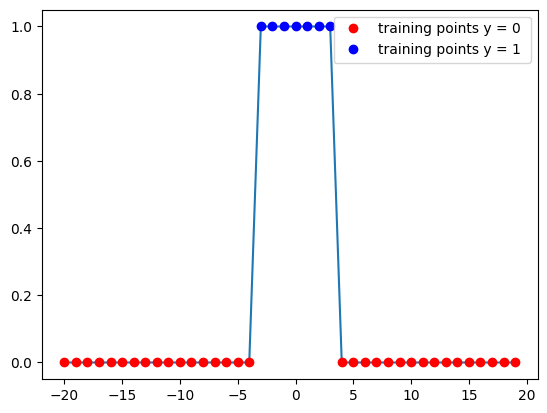

In [7]:
## 1. Make some data

# Make data
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

# Plot data
plt.plot(X,Y)

# Plot Data
plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y = 0 ' )
plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y = 1 ' )
plt.legend()
plt.show()

In [8]:
## 2. Define model

# Model class
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
       
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = torch.sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = torch.sigmoid(self.linear2(self.a1))
        return yhat

# Model object
model = Net(1,2,1)

In [9]:
## 3. Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost


In [10]:
## 4. Define optimizer and criterion

# Criterion
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

# Optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.1)


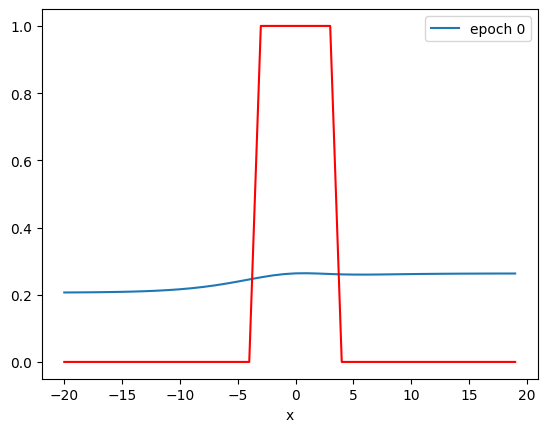

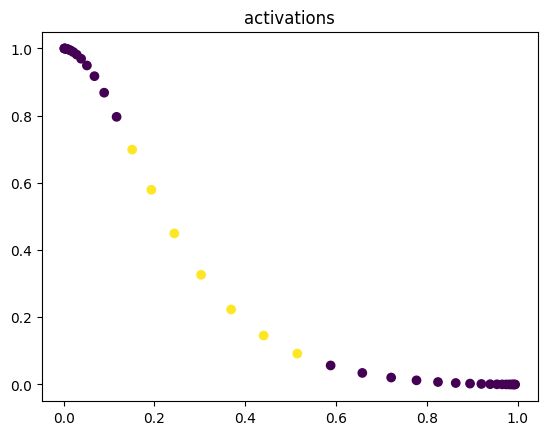

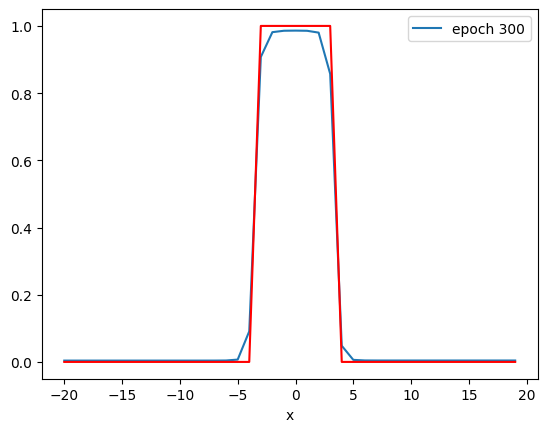

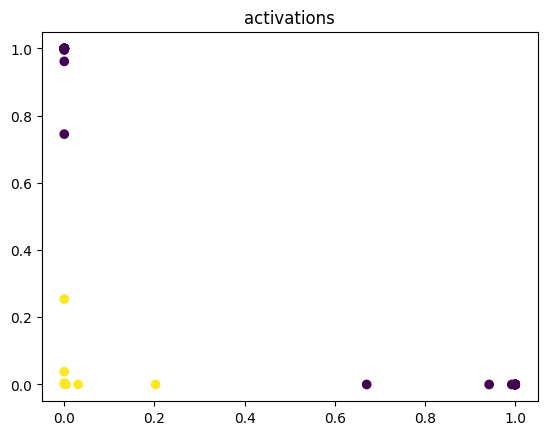

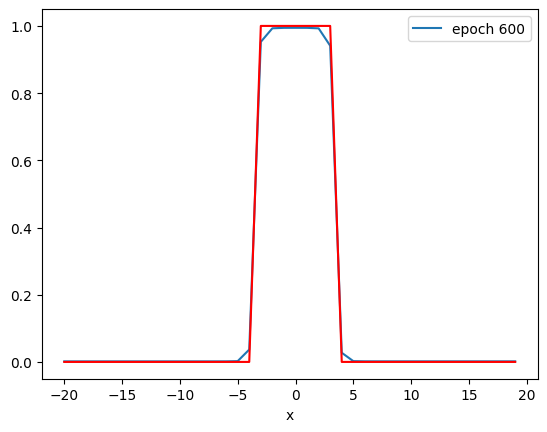

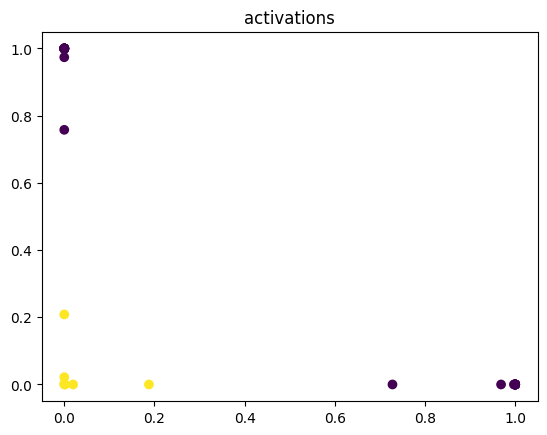

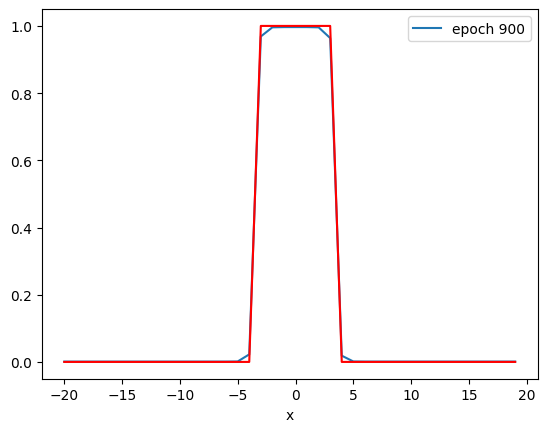

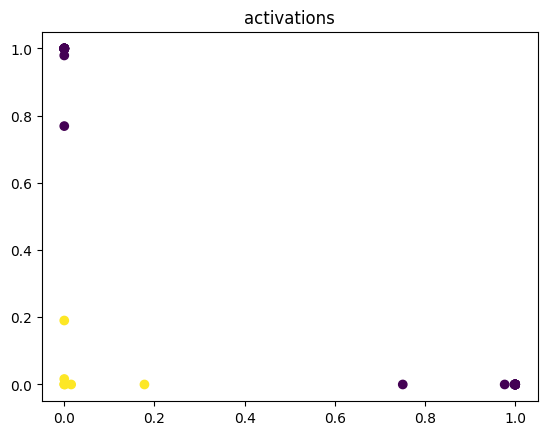

In [11]:
## 5. Train model
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)

Text(0.5, 1.0, 'cross entropy loss')

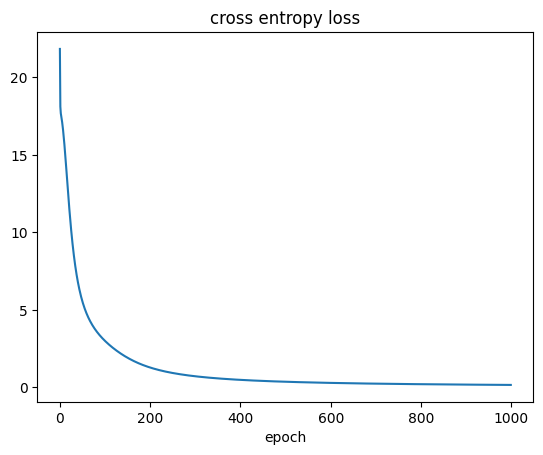

In [12]:
# Plot results
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  activation, you see by the 600th epoch that the data has been mapped to a linearly separable space.

In [14]:
## 6. Make predicitons
yhat = model(X)
(yhat > 0.5)[:20]

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

### One Hidden Layer for binary classification (1-dimensional input, $l$ neurons, 1-dimensional output)

In this example we'll use some linearlt separable dummy data in order to make classification. It's about aproximating the decision function. As  it gets more complex, we'll need more neurons. 

In [4]:
## 0. Import required tools
from torch import nn, optim, sigmoid
from torch.utils.data import Dataset, DataLoader

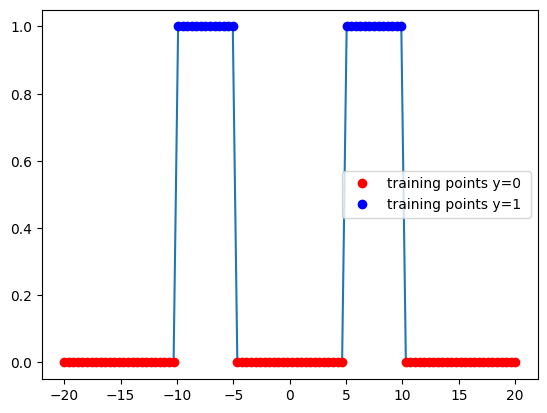

In [15]:
## 1. Make a Dataset object 

# Dataset subclass
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
  
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len


# Dataset object
data_set=Data()

# Plot Data 
X = data_set.x
Y = data_set.y
plt.plot(X, Y)
plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )
plt.legend()
plt.show()

In [16]:
## 2. Create model 

# Create model subclass
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

# Create model object
model = Net(1,9,1)

In [17]:
## 3. Create training function
def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)
        
        cost.append(total)
    return cost

In [18]:
## 4. Create criterion, optimizer and Dataloader objects
# Crierion
criterion = nn.BCELoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

# Trainloader object
train_loader = DataLoader(dataset = data_set,batch_size = 100)

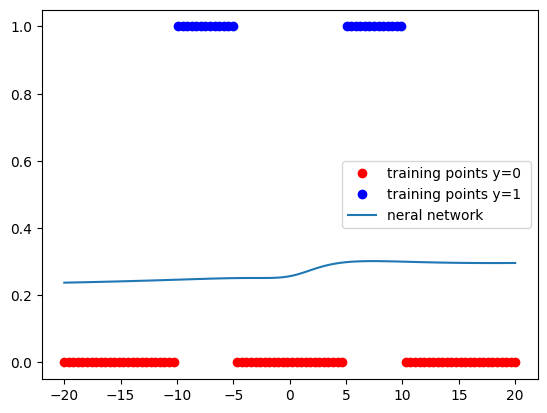

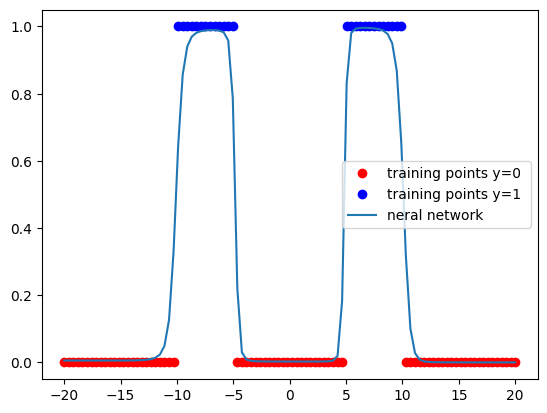

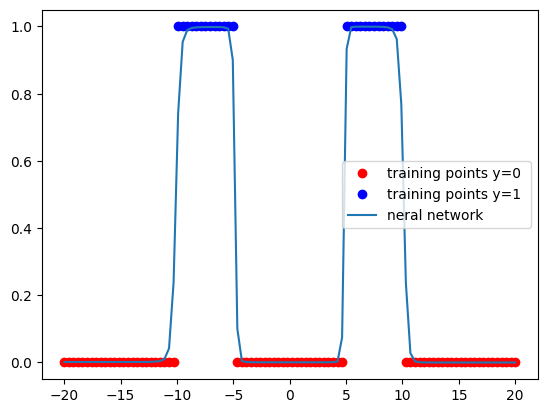

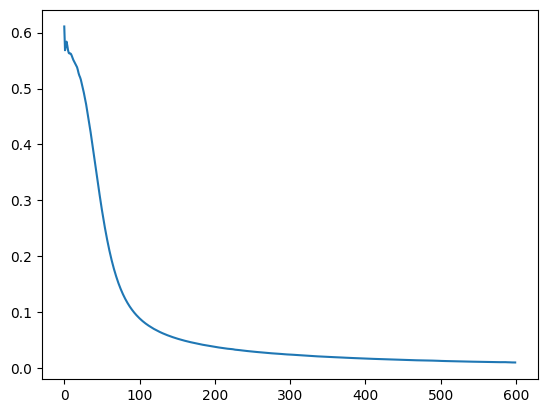

In [19]:
## 5. Train model
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

COST = train(data_set, model, criterion, train_loader, optimizer, epochs = 600, plot_number=200)
plt.plot(COST)

In [23]:
# Make predicitons
yhat = model(X)
yhat > 0.5

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False

### One Hidden Layer for binary classification (multi-dimensional inputs, $l$ neurons, 1-dimensional output)

In [32]:
## 0. Import required tools
from torch import nn, optim, sigmoid
from torch.utils.data import Dataset, DataLoader

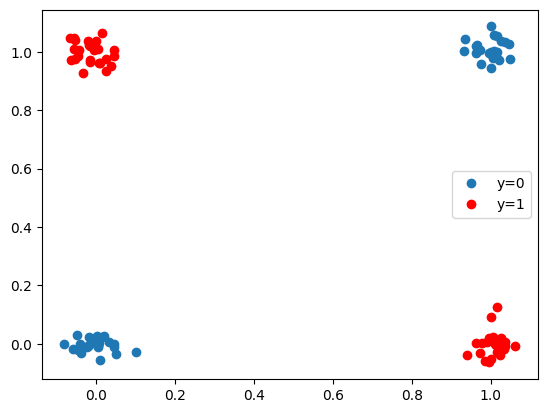

In [33]:
## 1. Make Dataset object 

# Dataset class
class XOR_Data(Dataset):
    
    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0]) 
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
    
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
    
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

# Dataset object 
data_set = XOR_Data()

# Plot data
X = data_set.x
Y = data_set.y
plt.plot(X[Y[:, 0] == 0, 0].numpy(), X[Y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
plt.plot(X[Y[:, 0] == 1, 0].numpy(), X[Y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
plt.legend()
plt.show()

In [34]:
## 2. Create model

# Model class 
class Net(nn.Module):
    
    # Constructor
    def __init__(self, input_size, l, out_size):
        super(Net, self).__init__()
        #hidden layer 
        self.linear1 = nn.Linear(input_size, l)
        #output layer 
        self.linear2 = nn.Linear(l, out_size)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = torch.sigmoid(self.linear2(x))
        return x

# Mocel object
model = Net(2,3,1)

In [40]:
## 3. Create training function

def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item()
        ACC.append(accuracy(model, data_set))
        COST.append(total)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

    return COST

In [37]:
##  4. Create trainig objects

# Criterion fuinction
criterion = nn.BCELoss()

# Dataloader obbject
train_loader = DataLoader(dataset = data_set, batch_size = 1)

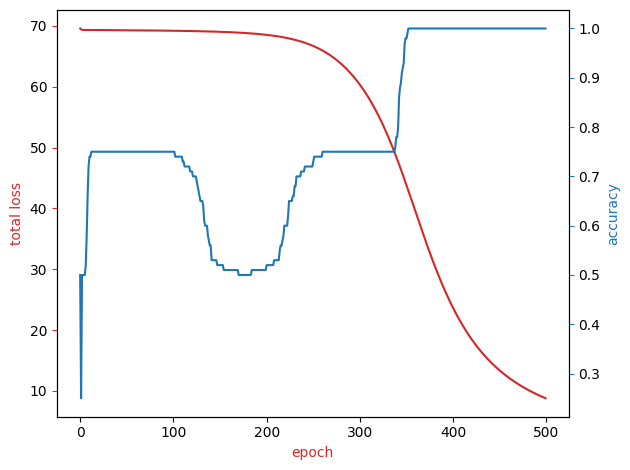

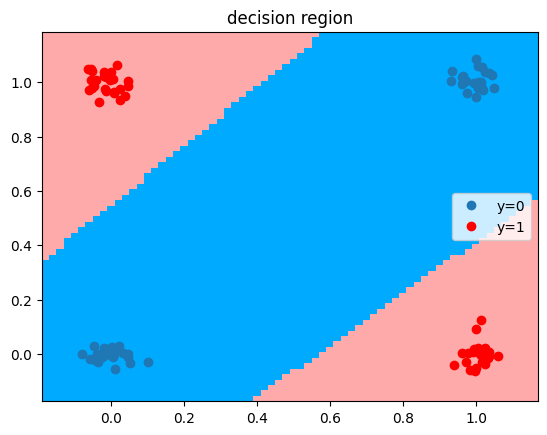

In [41]:
## 5. Train model

# Train model
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)

# Plot results
plot_decision_regions_2class(model, data_set)

In [42]:
## 6. Make some predictions
yhat = model(data_set.x)
yhat > 0.5

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True

### One Hidden Layer for multiclass classification (multi-dimensional inputs, $l$ neurons, multi-dimensional output)

In [3]:
## -1. Auxiliar functions 

# Accuracy calculator
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [5]:
## 0. Import required tools
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

In [6]:
## 1. Create Dataset objects
# Load training Dataset
train_dataset = dsets.MNIST(root = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data', train=True, download=True, transform=transforms.ToTensor())
# View training Dataset
print(train_dataset)
print(type(train_dataset))

# Load validation dataset
validation_dataset = dsets.MNIST(root= '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data', train=False, download=True, transform=transforms.ToTensor())
# View validation Dataset
print(validation_dataset)
print(type(validation_dataset))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data
    Split: Train
    StandardTransform
Transform: ToTensor()
<class 'torchvision.datasets.mnist.MNIST'>
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
<class 'torchvision.datasets.mnist.MNIST'>


In [7]:
## 2. Create model 

# Model class
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

# Model object
model = Net(28*28, 100 , 10)

In [8]:
## 3. Define training fucntion
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [9]:
## 4.  Create trainig objecs

# Criterion
criterion = nn.CrossEntropyLoss()

# Dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

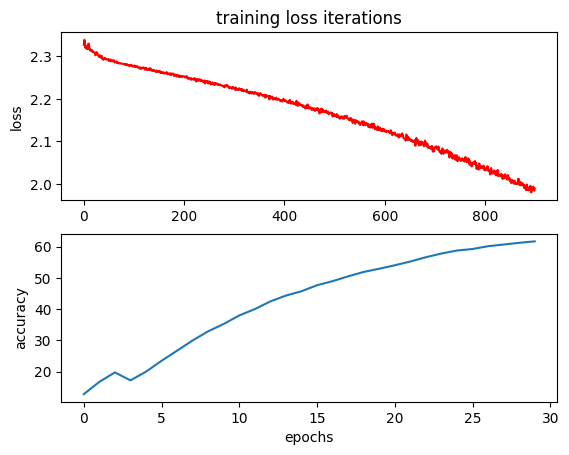

In [10]:
## 5. Train the model

# Train model
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

# Plot results
plot_accuracy_loss(training_results)

In [11]:
# 6. Make predictions
z = model(train_dataset[4][0].view(-1, 28 * 28))
print(z)
_, label = torch.max(z, 1)
print(label)

tensor([[-0.1509,  0.1832, -0.0018, -0.0434,  0.3842, -0.0781, -0.0043,  0.4223,
          0.1151,  0.3887]], grad_fn=<AddmmBackward0>)
tensor([7])


## Regression

In [3]:
## 0. Import required tools
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

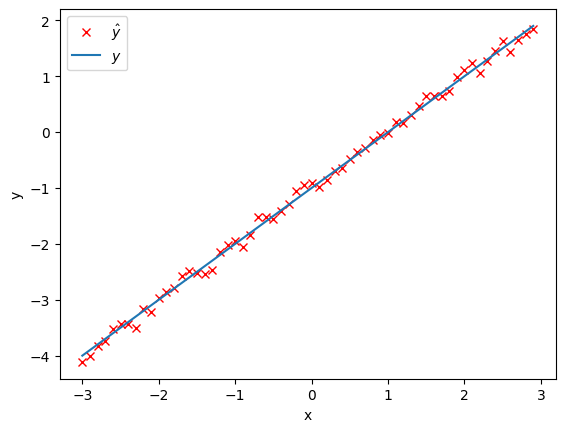

In [4]:
## 1. Create a Dataset object

# Create Dataset class
class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.y_hat = self.y + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

# Create Dataset object
data_set = Data()

# Plot the data
plt.plot(data_set.x.numpy(), data_set.y_hat.numpy(), 'rx', label = '$\hat{y}$')
plt.plot(data_set.x.numpy(), data_set.y.numpy(), label = '$y$' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [26]:
## 2. Create model 

# Model class
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

# Model object
model = Net(1, 50, 1)

In [27]:
## 3. Create training function

def train(data_set, model, criterion, train_loader, optimizer, epochs):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item()
        COST.append(total)
        
    plt.plot(COST)
    plt.xlabel('epoch')
    plt.ylabel('total loss')
    plt.tick_params(axis='y')
    plt.show()

    return COST

In [28]:
## 4. Create trainig objecs

# Criterion
criterion = nn.MSELoss()

# Dataloaders
train_loader = torch.utils.data.DataLoader(dataset = data_set, batch_size = 10)

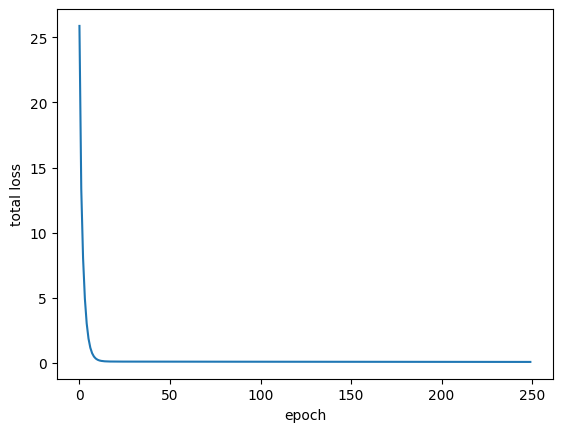

In [29]:
## 5. Train the model

# Train model
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
training_results = train(data_set, model, criterion, train_loader, optimizer, epochs = 250)

In [30]:
## 6. Make predictions
predictions = model(data_set.x)

r2:  0.6659195157461797
RMSE:  1.000981
MAE:  0.99531066


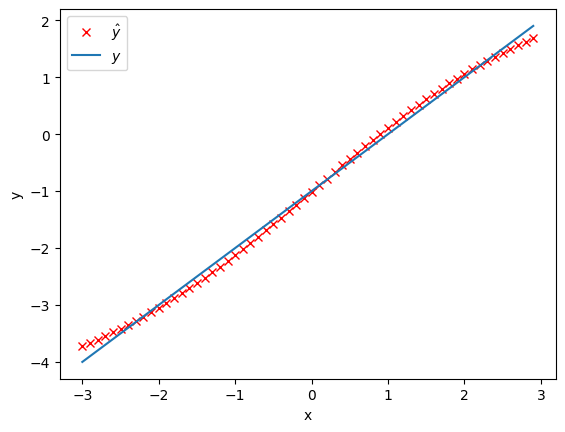

In [31]:
## 7. Evaluate model

# Calculate some metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score( data_set.x.numpy(), predictions.detach().numpy() )
rmse = np.sqrt( mean_squared_error( data_set.x.numpy(), predictions.detach().numpy() ) )
mae = mean_absolute_error( data_set.x.numpy(), predictions.detach().numpy() )
print('r2: ', r2)
print('RMSE: ', rmse)
print('MAE: ', mae)

# Plot the results
plt.plot(data_set.x.numpy(), predictions.detach().numpy(), 'rx', label = '$\hat{y}$')
plt.plot(data_set.x.numpy(), data_set.y.numpy(), label = '$y$' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
